**Fastset Peers from I2P Router Client Tunnel**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,node_full,short_id,frequency
0,eeyQrPJ04ANoyI29zH8vtIoUR5YmdVxmbXIq-dm7R1I=,eeyQ,6858
1,p97nVDf0PsBAwW8rxvTr9DT0j522i9piTd91nmAm5DU=,p97n,1839
2,FqIPhcf84X675DpkRBLHPwIKtawnjwkA8vn6uBFNX8M=,FqIP,1732
3,VQ0pJc5iLTOsFk3MDVIhi8mRbQROL2p85htCI~2ynMc=,VQ0p,1393
4,2vRxbqw-Mjlx2RQgwmCyHAED19YfoFpa3sDS6nsXOjo=,2vRx,1228
5,z9DJ6FjlV85pWOZGn26PP5tcGzDlWQqLkhuhh7CsIdA=,z9DJ,1111
6,Uo~3-o71X9UdZGLCBnzshY5vKlm9Gsuxr5agrFVbfB4=,Uo~3,1104
7,BHIY1YQzzbIwazzF-NB8LP7SuFjRRjfJtwlPXIScD5E=,BHIY,1080
8,bhtwqmjLF~6sGac6QUz1oCB2pwevyq34Ob8ml~LJm4o=,bhtw,1068
9,~8RgZYAZFvF-4YzeJYEA4UXz92ZQS2F1bzlIi9pAEfg=,~8Rg,1066


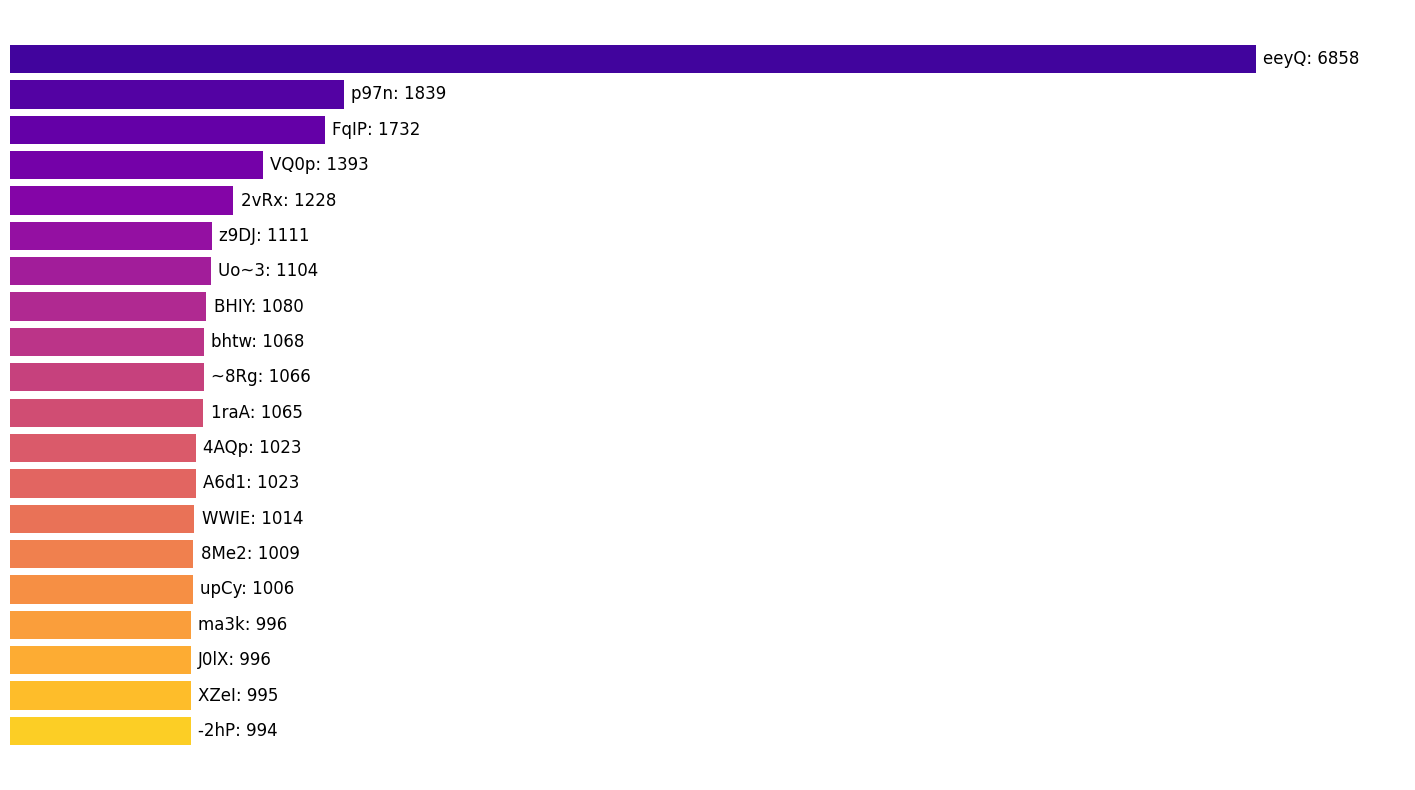

Saved chart to: /content/drive/MyDrive/DataInBrief-2025/Fastsetfrequency.png


In [5]:
# ==========================
# TOP-20 Fastset from By-Time file only (Colab)
# ==========================
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=False)
except Exception:
    pass

from pathlib import Path
import re
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- paths ----
PATH_TIME = Path("/content/drive/MyDrive/DataInBrief-2025/4-Fastset-Nodes-By-Time.txt")
OUT_PNG   = Path("/content/drive/MyDrive/DataInBrief-2025/Fastsetfrequency.png")
TOP_N = 20

# ---- extract & count node IDs from the time log ----
# Node IDs are long base64-like tokens containing A–Z a–z 0–9 and ~ - _ (often ending with '=')
NODE_RE = re.compile(r"[A-Za-z0-9~\-_]+={0,2}")

def count_nodes_from_time_log(path: Path, min_len: int = 24) -> Counter:
    if not path.exists():
        raise FileNotFoundError(f"Missing file: {path}")
    text = path.read_text(encoding="utf-8", errors="ignore")
    # find all candidate tokens, then keep only long ones to avoid timestamps/words
    tokens = NODE_RE.findall(text)
    tokens = [t for t in tokens if len(t) >= min_len]
    return Counter(tokens)

freq = count_nodes_from_time_log(PATH_TIME, min_len=24)
ranked = freq.most_common(TOP_N)

# table (full id, first 4 chars, count)
df = pd.DataFrame({
    "node_full": [n for n,_ in ranked],
    "short_id":  [n[:4] for n,_ in ranked],
    "frequency": [c for _,c in ranked],
})
display(df)

# ---- plot (colorful like your example) ----
vals   = df["frequency"].to_numpy()
labels = df["short_id"].tolist()
max_v  = int(vals.max()) if len(vals) else 0

plt.figure(figsize=(18, 10))
colors = plt.cm.plasma(np.linspace(0.10, 0.90, len(vals)))  # purple -> yellow gradient
bars = plt.barh(np.arange(len(vals)), vals, color=colors)

# largest at top
plt.gca().invert_yaxis()

# clean look: hide ticks/spines
plt.yticks([]); plt.xticks([])
for sp in plt.gca().spines.values():
    sp.set_visible(False)

# annotate "abcd: N"
for i, (v, sid) in enumerate(zip(vals, labels)):
    plt.text(v + max(5, max_v * 0.006), i, f"{sid}: {int(v)}",
             va="center", ha="left", fontsize=12)

plt.xlim(0, max_v * 1.12 if max_v else 1)
OUT_PNG.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(OUT_PNG, bbox_inches="tight", dpi=200)
plt.show()

print(f"Saved chart to: {OUT_PNG}")


In [6]:
# ==== PROOF MODE: verify counts come from the time-log file ====
from pathlib import Path
import hashlib, re
from collections import Counter
import numpy as np
import pandas as pd

PATH_TIME = Path("/content/drive/MyDrive/DataInBrief-2025/4-Fastset-Nodes-By-Time.txt")
assert PATH_TIME.exists(), f"Not found: {PATH_TIME}"

# 1) Show file info + hash
data = PATH_TIME.read_bytes()
sha256 = hashlib.sha256(data).hexdigest()
print(f"File: {PATH_TIME}")
print(f"Size: {len(data):,} bytes")
print(f"SHA-256: {sha256}")

text = data.decode("utf-8", errors="ignore")

# 2) Method A (regex findall → Counter)
NODE_RE = re.compile(r"[A-Za-z0-9~\-_]+={0,2}")
tokensA = [t for t in NODE_RE.findall(text) if len(t) >= 24]
cntA = Counter(tokensA)

# 3) Method B (line-by-line scanning → Counter)
cntB = Counter()
for line in text.splitlines():
    for t in NODE_RE.findall(line):
        if len(t) >= 24:
            cntB[t] += 1

# 4) Check both methods agree exactly
assert cntA == cntB, "Independent counting methods disagree!"
print("Independent counting methods match ✔️")

# 5) Show TOP-20 from the file
top20 = cntA.most_common(20)
df_top20 = pd.DataFrame({
    "node_full": [n for n,_ in top20],
    "short_id":  [n[:4] for n,_ in top20],
    "frequency": [c for _,c in top20],
})
display(df_top20)

# 6) Optional: spot-check a prefix like 'eeyQ'
prefix = "eeyQ"
subset = [(n,c) for n,c in cntA.items() if n.startswith(prefix)]
subset = sorted(subset, key=lambda x: x[1], reverse=True)
if subset:
    print(f"\nAll nodes starting with '{prefix}' (full IDs and counts):")
    for n,c in subset:
        print(f"{n}  {c}")
    print(f"Total for prefix '{prefix}': {sum(c for _,c in subset)}")
else:
    print(f"\nNo nodes start with '{prefix}'.")


File: /content/drive/MyDrive/DataInBrief-2025/4-Fastset-Nodes-By-Time.txt
Size: 24,517,815 bytes
SHA-256: e3ec48a7f47d1286a164a26868865e83c4b3bd39d46634375680995ce4f6f535
Independent counting methods match ✔️


,node_full,short_id,frequency
0,eeyQrPJ04ANoyI29zH8vtIoUR5YmdVxmbXIq-dm7R1I=,eeyQ,6858
1,p97nVDf0PsBAwW8rxvTr9DT0j522i9piTd91nmAm5DU=,p97n,1839
2,FqIPhcf84X675DpkRBLHPwIKtawnjwkA8vn6uBFNX8M=,FqIP,1732
3,VQ0pJc5iLTOsFk3MDVIhi8mRbQROL2p85htCI~2ynMc=,VQ0p,1393
4,2vRxbqw-Mjlx2RQgwmCyHAED19YfoFpa3sDS6nsXOjo=,2vRx,1228
5,z9DJ6FjlV85pWOZGn26PP5tcGzDlWQqLkhuhh7CsIdA=,z9DJ,1111
6,Uo~3-o71X9UdZGLCBnzshY5vKlm9Gsuxr5agrFVbfB4=,Uo~3,1104
7,BHIY1YQzzbIwazzF-NB8LP7SuFjRRjfJtwlPXIScD5E=,BHIY,1080
8,bhtwqmjLF~6sGac6QUz1oCB2pwevyq34Ob8ml~LJm4o=,bhtw,1068
9,~8RgZYAZFvF-4YzeJYEA4UXz92ZQS2F1bzlIi9pAEfg=,~8Rg,1066



All nodes starting with 'eeyQ' (full IDs and counts):
eeyQrPJ04ANoyI29zH8vtIoUR5YmdVxmbXIq-dm7R1I=  6858
Total for prefix 'eeyQ': 6858


**Combining the files = 4 Fastset-Nodes-By-Time.txt and 5-Fastset-Frequency.txt**. Thus from several Other ROuters since the deployment was largescale usign the SWARMI2P Framework

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Unique nodes in file: 2879
Total events in file: 50935494

Top-20 (full id → count):
eeyQrPJ04ANoyI29zH8vtIoUR5YmdVxmbXIq-dm7R1I=  1253406
Pv~HfV8~EkhX2jjY8Thm~~rr82oF8YjaeuqUc2Usbqk=  442224
z9DJ6FjlV85pWOZGn26PP5tcGzDlWQqLkhuhh7CsIdA=  439352
GXmpKOlDJ5NcSTwwUchKe2BRmxCpXScTQb2NjvWm2Ac=  367206
X3JtfgYa0ZxpKxBgXeaPAfTriqEtfnpadPYqjK7E8hA=  365546
RaGUK5AqqBmKfBAmhzcy5Bs3JzYntD6J~tugOaYvuS4=  350392
wqGYlFlqQ1XurW3anMAG1KYogbUKOXWV5arS3Zaz0U8=  327635
QfcqT6pekQOpUtlB~tSPUl78-Sc7BNlyN7gCklSacjc=  322961
gOaGtsbHNyWGHLgC~HIO~gA6Nt8jOWpc8PqP5JmDqC8=  320560
jbtshaf6xOEVDGdDEJNxrvhd3zVbBSZ9TUr0DlmkTb0=  316872
TU4AVivTZ6DfGf~npsox8OwzaQHEU8U04gZEvKwGL~I=  310263
sH6LE9-GzzMaIP1ZNizSo0P-U~2oX64Yz02MHE1tlLU=  304713
F9577L-sYcTt-t~41WmggUniLMDGoQLKprBU4BkbHhg=  298143
lszbuC3RnJLZcrf~8RWwPt5BQIyvi9BFQDuiBwGFhpA=  296534
136FLxtnfsKbytcdgwEtgS1Ch~v3lxpMqZE06BLovwo

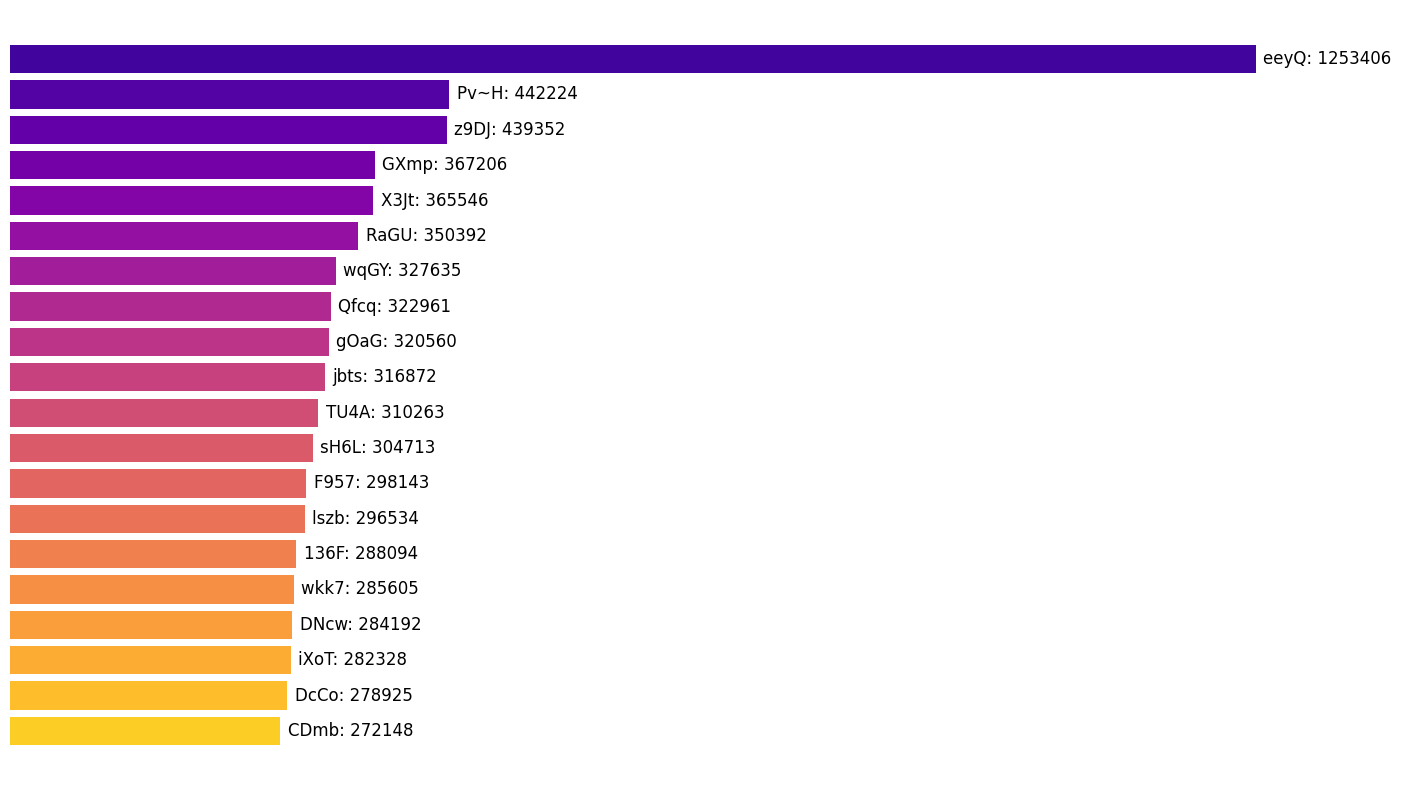


Saved colorful bar chart to: /content/drive/MyDrive/DataInBrief-2025/Fastsetfrequency.png


In [7]:
# ==========================
# Fastset TOP-20 from Frequency File (Colab)
# ==========================
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=False)
except Exception:
    pass

from pathlib import Path
import re
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- paths ----
PATH_FREQ = Path("/content/drive/MyDrive/DataInBrief-2025/5-Fastset-Frequency.txt")
OUT_PNG   = Path("/content/drive/MyDrive/DataInBrief-2025/Fastsetfrequency.png")
TOP_N = 20

# ---- robust parser for (node, count) lines ----
def read_frequency_file(path: Path) -> Counter:
    """
    Accepts lines like:
      node,count
      node : count
      node  count
      count,node
    Ignores blank/header/noise lines. Aggregates duplicates.
    """
    if not path.exists():
        raise FileNotFoundError(f"Missing file: {path}")
    freq = Counter()
    pat_pairs = [
        re.compile(r"^\s*([^\s,:;|]+)\s*[:|,;\t ]+\s*(\d+)\s*$"),   # node first
        re.compile(r"^\s*(\d+)\s*[:|,;\t ]+\s*([^\s,:;|]+)\s*$"),   # count first
    ]
    with path.open("r", encoding="utf-8", errors="ignore") as f:
        for raw in f:
            s = raw.strip()
            if not s:
                continue
            m = None
            for pat in pat_pairs:
                m = pat.match(s)
                if m:
                    break
            if m:
                a, b = m.groups()
                if a.isdigit():  # count first
                    node, cnt = b, int(a)
                else:
                    node, cnt = a, int(b)
                freq[node] += cnt
                continue
            # fallback: split and use last int as count
            parts = re.split(r"[:|,;\t ]+", s)
            ints  = [p for p in parts if p.isdigit()]
            toks  = [p for p in parts if p and not p.isdigit()]
            if ints and toks:
                freq[toks[0]] += int(ints[-1])
            # else: ignore (header/noise)
    return freq

# ---- load, rank, take top-20 ----
freq = read_frequency_file(PATH_FREQ)
ranked = sorted(freq.items(), key=lambda kv: kv[1], reverse=True)[:TOP_N]

df = pd.DataFrame({
    "node_full": [n for n,_ in ranked],
    "short_id":  [n[:4] for n,_ in ranked],   # strictly first 4 characters
    "frequency": [c for _,c in ranked],
})

# show the table for verification
df
print(f"Unique nodes in file: {len(freq)}")
print(f"Total events in file: {sum(freq.values())}")
print("\nTop-20 (full id → count):")
for n, c in ranked:
    print(f"{n:>8}  {c}")

# ---- plot (colorful, clean, annotated) ----
vals   = df["frequency"].to_numpy()
labels = df["short_id"].tolist()
max_v  = int(vals.max()) if len(vals) else 0

plt.figure(figsize=(18, 10))
colors = plt.cm.plasma(np.linspace(0.10, 0.90, len(vals)))  # purple→yellow gradient
bars = plt.barh(np.arange(len(vals)), vals, color=colors)

# largest on top
plt.gca().invert_yaxis()

# clean aesthetic
plt.yticks([]); plt.xticks([])
for sp in plt.gca().spines.values():
    sp.set_visible(False)

# annotate as "abcd: N"
for i, (v, sid) in enumerate(zip(vals, labels)):
    plt.text(v + max(5, max_v * 0.006), i, f"{sid}: {int(v)}",
             va="center", ha="left", fontsize=12)

plt.xlim(0, max_v * 1.12 if max_v else 1)
OUT_PNG.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(OUT_PNG, bbox_inches="tight", dpi=200)
plt.show()

print(f"\nSaved colorful bar chart to: {OUT_PNG}")
